# Postprocessing Notebook for IDSM1

In [1]:
#interactive widget requires pip install ipympl  
%matplotlib widget
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [7]:
df = pd.read_csv("./simulations/tb_ideal_idsm1.txt", sep=r'\s+')

In [8]:
df

,time,vo,q,p1,p2
0,0.000000e+00,0.000000e+00,5.915810e-08,0.0,1.200
1,1.000000e-12,1.397427e-19,5.915810e-08,0.0,1.188
2,2.000000e-12,1.061787e-19,5.915810e-08,0.0,1.176
3,4.000000e-12,2.833365e-19,5.915810e-08,0.0,1.152
4,8.000000e-12,1.027102e-18,5.915809e-08,0.0,1.104
...,...,...,...,...,...
15925,6.396705e-05,-1.971913e-01,5.915810e-08,0.0,1.200
15926,6.397705e-05,-1.971913e-01,5.915810e-08,0.0,1.200
15927,6.398705e-05,-1.971913e-01,5.915810e-08,0.0,1.200
15928,6.399705e-05,-1.971913e-01,5.915810e-08,0.0,1.200


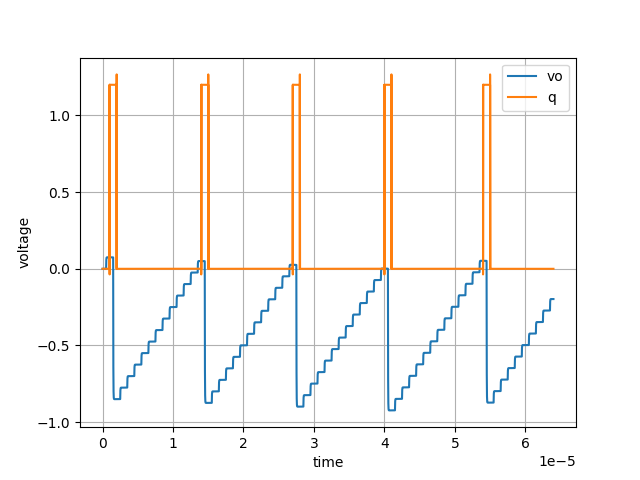

In [9]:
plt.figure(1)
plt.clf()
plt.plot(df['time'], df['vo'], label="vo")
plt.plot(df['time'], df['q'], label="q")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [10]:
# sample q and count number of ones
t = df['time']
ts = np.arange(1.5e-6, 1.5e-6+63*1e-6, 1e-6)
q = df['q']
interp_func = interp1d(t, q)
qsamp = interp_func(ts)
qsamp[qsamp > 0.5] = 1
qsamp[qsamp < 0.5] = 0
dout = np.cumsum(qsamp)
vin = 0.075*64

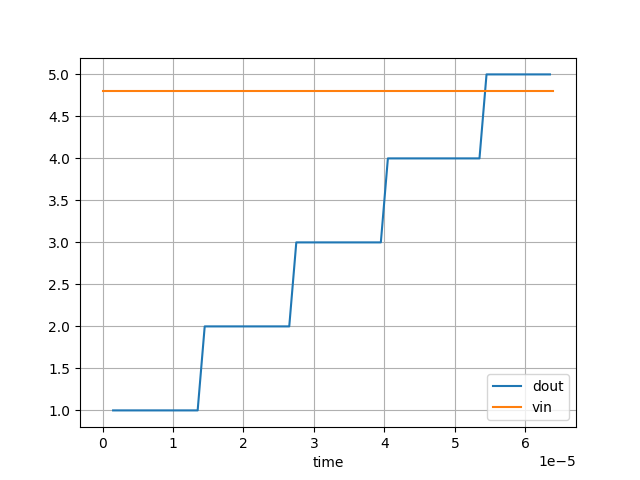

In [11]:
plt.figure(2)
plt.clf()
plt.plot(ts, dout, label="dout")
plt.plot([0, 64e-6], [vin, vin], label="vin")
plt.xlabel("time")
plt.legend(loc="lower right")
plt.grid()
plt.show()